<a href="https://colab.research.google.com/github/jpantojaj/Backtesting_Stresstesting/blob/main/Sesi%C3%B3n_5_LGD_EAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Datos

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
loan_data_defaults = pd.read_csv('loan_data_defaults.csv')

In [8]:
loan_data_defaults.shape

(43236, 52)

# Exploramos los datos

In [6]:
loan_data_defaults.columns.values

array(['Unnamed: 0', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'home_ownership:RENT',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:f', 'initial_list_status:w', 'term_int',
       'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',


In [7]:
loan_data_defaults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43236 entries, 0 to 43235
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           43236 non-null  int64  
 1   grade:A                              43236 non-null  int64  
 2   grade:B                              43236 non-null  int64  
 3   grade:C                              43236 non-null  int64  
 4   grade:D                              43236 non-null  int64  
 5   grade:E                              43236 non-null  int64  
 6   grade:F                              43236 non-null  int64  
 7   grade:G                              43236 non-null  int64  
 8   home_ownership:MORTGAGE              43236 non-null  int64  
 9   home_ownership:NONE                  43236 non-null  int64  
 10  home_ownership:OTHER                 43236 non-null  int64  
 11  home_ownership:OWN          

In [9]:
loan_data_defaults.head()

,Unnamed: 0,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,...,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,recovery_rate,CCF
0,1,0,0,1,0,0,0,0,0,0,...,5,164,0,3,0,4,0,2500,0.046832,0.817416
1,8,0,0,0,0,0,1,0,0,0,...,2,164,0,11,0,13,0,5600,0.033761,0.971068
2,9,0,1,0,0,0,0,0,0,0,...,0,164,0,2,0,3,0,5375,0.050100,0.874701
3,12,0,0,1,0,0,0,0,0,0,...,1,164,0,4,0,9,0,9000,0.049367,0.860429
4,14,0,1,0,0,0,0,0,0,0,...,2,164,0,14,0,29,0,10000,0.064510,0.456653


In [13]:
loan_data_defaults.drop(columns = ['Unnamed: 0'], inplace = True)

In [14]:
loan_data_defaults.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'home_ownership:RENT', 'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:f', 'initial_list_status:w', 'term_int',
       'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_la

In [15]:
loan_data_defaults.shape

(43236, 51)

In [16]:
loan_data_defaults=loan_data_defaults.drop_duplicates()
loan_data_defaults.reset_index()
loan_data_defaults.shape

(43236, 51)

In [17]:
null_values = pd.concat([loan_data_defaults.isnull().sum(), loan_data_defaults.isnull().sum() / len(loan_data_defaults)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values

,number_null_values,ratio_null_values
grade:A,0,0.0
grade:B,0,0.0
grade:C,0,0.0
grade:D,0,0.0
grade:E,0,0.0
grade:F,0,0.0
grade:G,0,0.0
home_ownership:MORTGAGE,0,0.0
home_ownership:NONE,0,0.0
home_ownership:OTHER,0,0.0


In [18]:
loan_data_defaults.select_dtypes(include=['number']).describe().T

,count,mean,std,min,25%,50%,75%,max
grade:A,43236.0,0.058632,0.234937,0.000000,0.000000,0.000000,0.000000,1.000000e+00
grade:B,43236.0,0.213757,0.409962,0.000000,0.000000,0.000000,0.000000,1.000000e+00
grade:C,43236.0,0.279142,0.448583,0.000000,0.000000,0.000000,1.000000,1.000000e+00
grade:D,43236.0,0.230017,0.420848,0.000000,0.000000,0.000000,0.000000,1.000000e+00
grade:E,43236.0,0.135720,0.342495,0.000000,0.000000,0.000000,0.000000,1.000000e+00
grade:F,43236.0,0.064252,0.245204,0.000000,0.000000,0.000000,0.000000,1.000000e+00
grade:G,43236.0,0.018480,0.134681,0.000000,0.000000,0.000000,0.000000,1.000000e+00
home_ownership:MORTGAGE,43236.0,0.442849,0.496729,0.000000,0.000000,0.000000,1.000000,1.000000e+00
home_ownership:NONE,43236.0,0.000185,0.013602,0.000000,0.000000,0.000000,0.000000,1.000000e+00
home_ownership:OTHER,43236.0,0.000879,0.029634,0.000000,0.000000,0.000000,0.000000,1.000000e+00


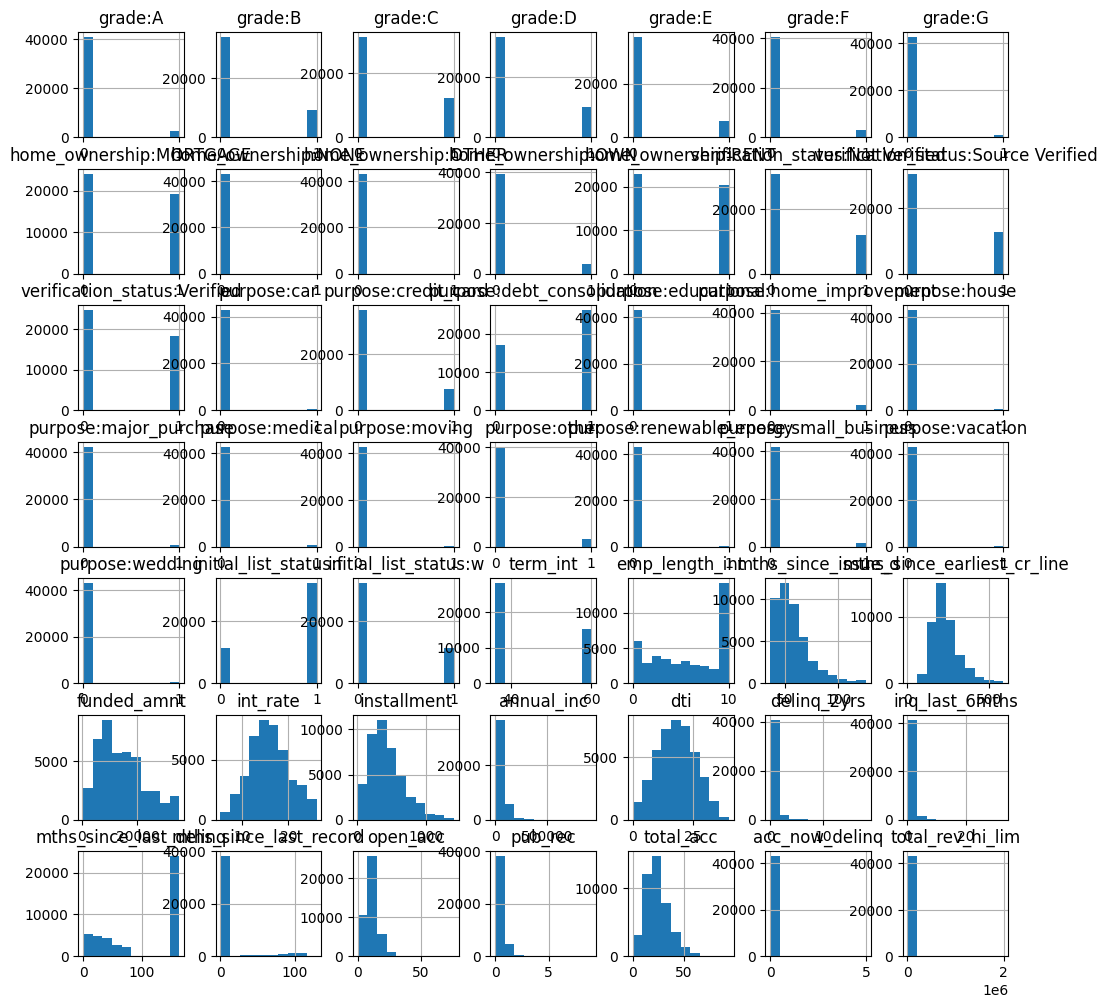

In [19]:
loan_data_defaults.drop(columns = ['recovery_rate','CCF']).hist(figsize = (12, 12))
plt.show()

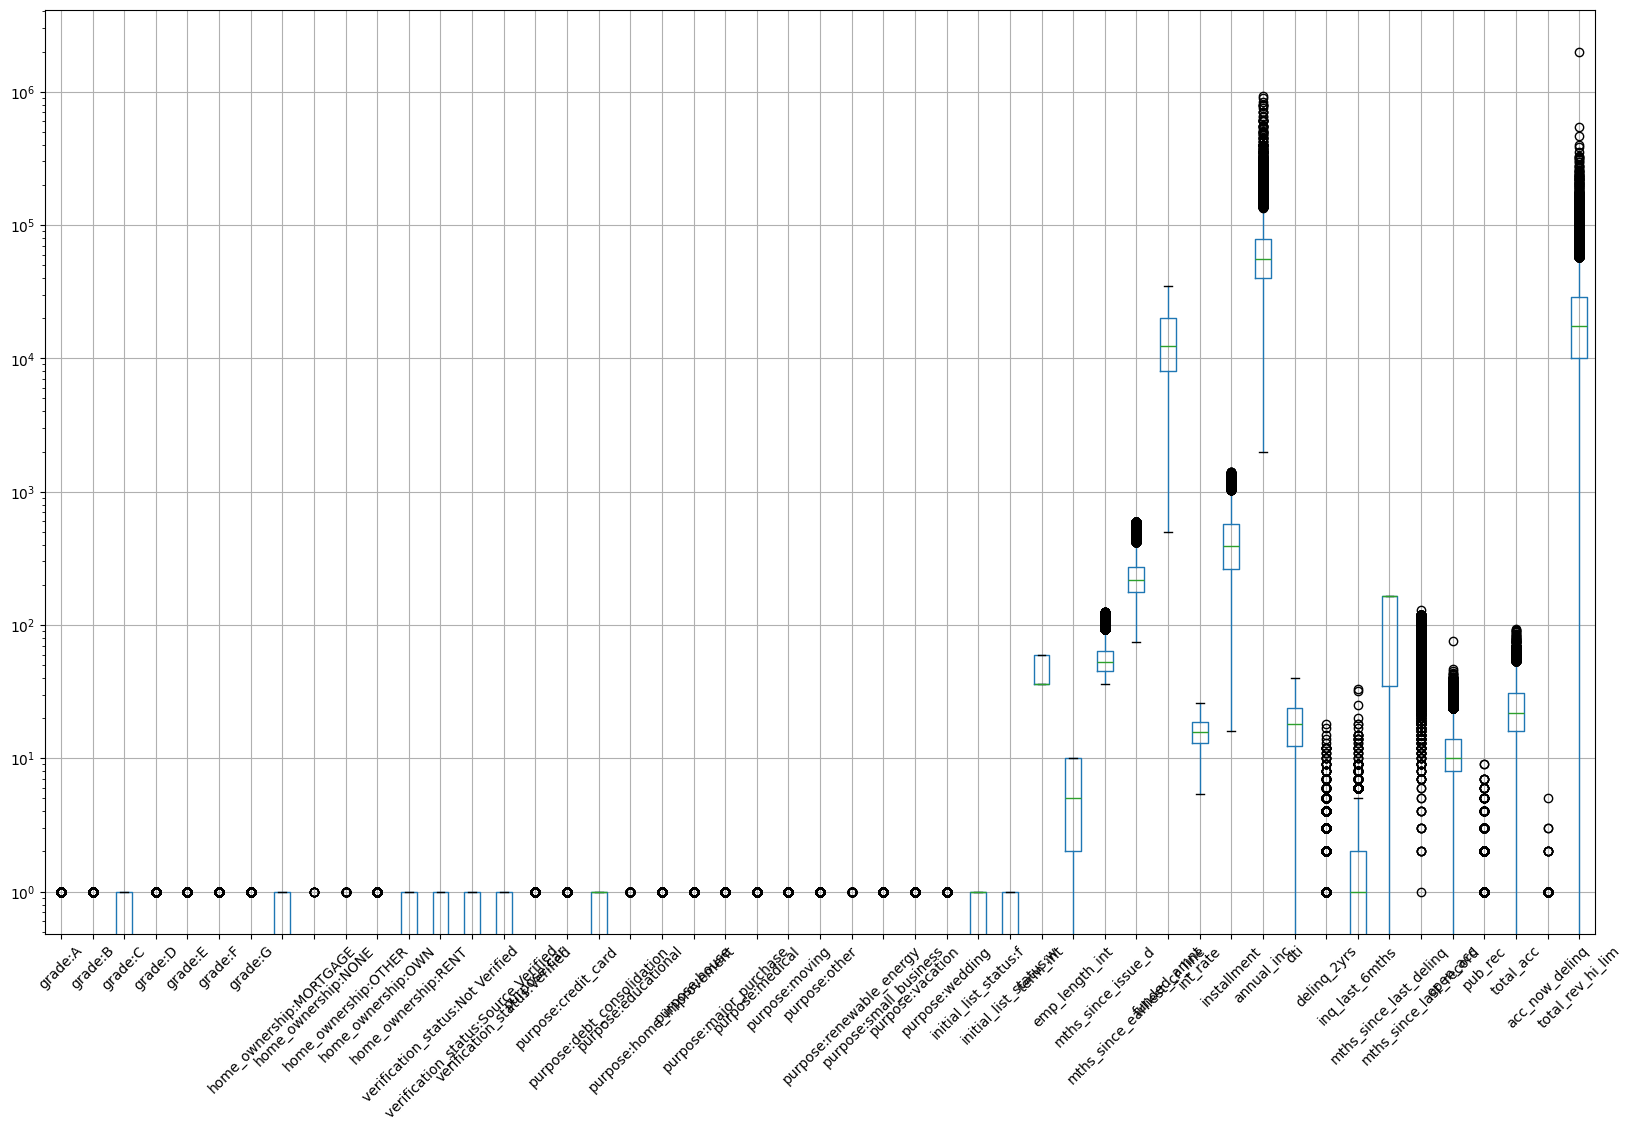

In [20]:
loan_data_defaults.drop(columns = ['recovery_rate','CCF']).boxplot(figsize = (20, 12))
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

In [21]:
def outliers_col(df):
  for columna in df:
    if df[columna].dtype != object:
      q1 = stats.scoreatpercentile(df[columna], 25)
      q3 = stats.scoreatpercentile(df[columna], 75)
      iqr = q3-q1
      lim_inf = q1-1.5*iqr
      lim_sup = q3+1.5*iqr
      n_outliers_inf = len(df[(df[columna]<lim_inf)])
      n_outliers_sup = len(df[(df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers_inf,
          n_outliers_sup
          ))

In [22]:
outliers_col(loan_data_defaults)

grade:A | 0 | 2535
grade:B | 0 | 9242
grade:C | 0 | 0
grade:D | 0 | 9945
grade:E | 0 | 5868
grade:F | 0 | 2778
grade:G | 0 | 799
home_ownership:MORTGAGE | 0 | 0
home_ownership:NONE | 0 | 8
home_ownership:OTHER | 0 | 38
home_ownership:OWN | 0 | 3785
home_ownership:RENT | 0 | 0
verification_status:Not Verified | 0 | 0
verification_status:Source Verified | 0 | 0
verification_status:Verified | 0 | 0
purpose:car | 0 | 438
purpose:credit_card | 0 | 7449
purpose:debt_consolidation | 0 | 0
purpose:educational | 0 | 88
purpose:home_improvement | 0 | 2197
purpose:house | 0 | 278
purpose:major_purchase | 0 | 831
purpose:medical | 0 | 545
purpose:moving | 0 | 408
purpose:other | 0 | 2892
purpose:renewable_energy | 0 | 52
purpose:small_business | 0 | 1394
purpose:vacation | 0 | 259
purpose:wedding | 0 | 278
initial_list_status:f | 0 | 0
initial_list_status:w | 0 | 0
term_int | 0 | 0
emp_length_int | 0 | 0
mths_since_issue_d | 0 | 1631
mths_since_earliest_cr_line | 3 | 1518
funded_amnt | 0 | 0
int_r

# Recovery Rate

In [23]:
loan_data_defaults['recovery_rate'].describe()

,recovery_rate
count,43236.000000
mean,0.060820
std,0.089770
min,0.000000
25%,0.000000
50%,0.029466
75%,0.114044
max,1.220774


In [24]:
#Topea el recovery rate
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])

In [25]:
loan_data_defaults['recovery_rate'].describe()

,recovery_rate
count,43236.000000
mean,0.060770
std,0.089202
min,0.000000
25%,0.000000
50%,0.029466
75%,0.114044
max,1.000000


In [26]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 6.8 MB/s eta 0:00:00


# Exploramos las variables

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

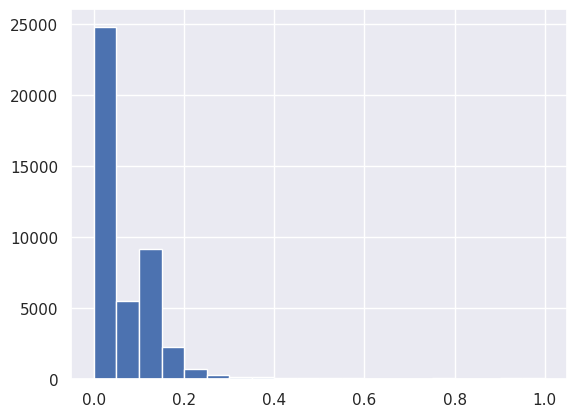

In [28]:
#Ploteamos el recovery rate
plt.hist(loan_data_defaults['recovery_rate'], bins = 20)
plt.show()

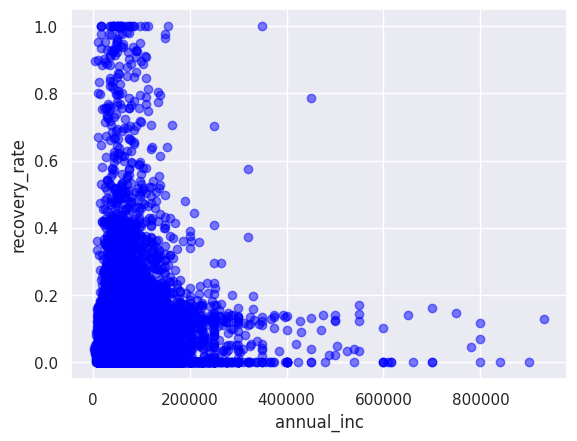

In [29]:
# Plotea variables
plt.scatter(loan_data_defaults['annual_inc'], loan_data_defaults['recovery_rate'],c='blue', alpha=0.5)
plt.xlabel('annual_inc')
plt.ylabel('recovery_rate')
plt.show()

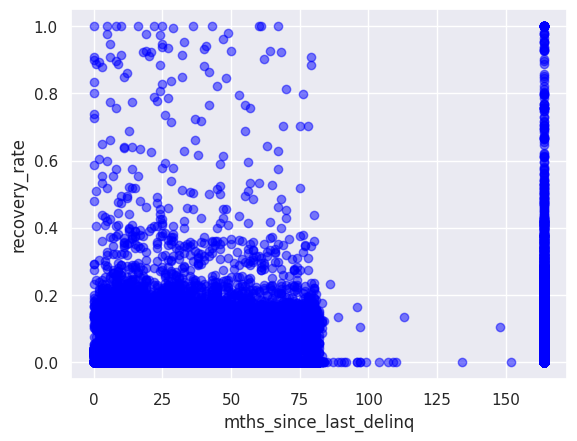

In [30]:
# Plotea variables
plt.scatter(loan_data_defaults['mths_since_last_delinq'], loan_data_defaults['recovery_rate'],c='blue', alpha=0.5)
plt.xlabel('mths_since_last_delinq')
plt.ylabel('recovery_rate')
plt.show()

In [31]:
loan_data_defaults.groupby('grade:E', as_index = False)['recovery_rate'].mean()

,grade:E,recovery_rate
0,0,0.059168
1,1,0.070973


In [32]:
#Dada la alta concentración de recovery rate en 0, vamos a crear una nueva variable
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

In [33]:
loan_data_defaults['recovery_rate_0_1'].value_counts()

,count
recovery_rate_0_1,
1,24371
0,18865


## Generamos un Modelo de LGD: Dividimos la generación del modelo en 2 etapas

### Dividimos la data

In [34]:
from sklearn.model_selection import train_test_split
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 123)

In [35]:
lgd_inputs_stage_1_train.shape, lgd_inputs_stage_1_test.shape

((34588, 49), (8648, 49))

In [45]:
lgd_targets_stage_1_train.value_counts()/lgd_targets_stage_1_train.shape[0]

,count
recovery_rate_0_1,
1,0.563375
0,0.436625


In [46]:
lgd_targets_stage_1_test.value_counts()/lgd_targets_stage_1_test.shape[0]

,count
recovery_rate_0_1,
1,0.56487
0,0.43513


### Preparing the Inputs

In [ ]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [49]:
feature_num=[
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [ ]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [51]:
lgd_inputs_stage_1_train[feature_num].describe().T

,count,mean,std,min,25%,50%,75%,max
term_int,34588.0,44.377935,11.440473,36.00,36.00,36.000,60.0000,60.00
emp_length_int,34588.0,5.472303,3.752654,0.00,2.00,5.000,10.0000,10.00
mths_since_issue_d,34588.0,56.674136,15.929913,36.00,45.00,53.000,64.0000,126.00
mths_since_earliest_cr_line,34588.0,233.763299,83.302900,0.00,178.00,219.000,273.0000,587.00
funded_amnt,34588.0,14382.806176,8340.382132,600.00,8000.00,12250.000,20000.0000,35000.00
int_rate,34588.0,15.977171,4.275880,5.42,13.05,15.650,18.8650,26.06
installment,34588.0,438.092869,246.831790,21.59,262.08,388.085,571.1075,1408.13
annual_inc,34588.0,64945.929441,41163.401871,3600.00,40000.00,56000.000,78000.0000,932000.00
dti,34588.0,18.143523,7.818831,0.00,12.43,18.160,23.7700,39.91
delinq_2yrs,34588.0,0.270007,0.777153,0.00,0.00,0.000,0.0000,18.00


In [60]:
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [61]:
pipe_1 = Pipeline(
    [
        (   "capper",
            Winsorizer(variables=['term_int','emp_length_int','mths_since_issue_d','mths_since_earliest_cr_line','funded_amnt','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','total_acc','total_rev_hi_lim'], capping_method="quantiles", tail="both", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['term_int','emp_length_int','mths_since_issue_d','mths_since_earliest_cr_line','funded_amnt','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','total_acc','total_rev_hi_lim'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        )
    ]
)

In [62]:
pipe_1.fit(lgd_inputs_stage_1_train)

Pipeline(steps=[('capper',
                 Winsorizer(capping_method='quantiles', fold=0.01, tail='both',
                            variables=['term_int', 'emp_length_int',
                                       'mths_since_issue_d',
                                       'mths_since_earliest_cr_line',
                                       'funded_amnt', 'int_rate', 'installment',
                                       'annual_inc', 'dti', 'delinq_2yrs',
                                       'inq_last_6mths',
                                       'mths_since_last_delinq',
                                       'mths_since_last_record', 'open_acc',
                                       'pub_rec', 'total_acc',
                                       't...
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['term_int', 'emp_length_int',
                                                   'mths_since_issue_d',
                                                   'mths_since_earliest_cr_line',
                                                   'funded_amnt', 'int_rate',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'open_acc', 'pub_rec',
                                                   'total_acc',
                                                   'total_rev_hi_lim'])],
                                   verbose_feature_names_out=False))])

In [63]:
lgd_inputs_stage_1_train_t = pipe_1.transform(lgd_inputs_stage_1_train)
lgd_inputs_stage_1_test_t = pipe_1.transform(lgd_inputs_stage_1_test)

In [64]:
lgd_inputs_stage_1_train_t.head()

,term_int,emp_length_int,mths_since_issue_d,mths_since_earliest_cr_line,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,...,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f,initial_list_status:w,acc_now_delinq
7183,0.0,0.250,-0.263158,1.136842,1.229167,0.330181,1.884056,1.552632,-0.350970,0.0,...,0,0,0,0,0,0,0,1,0,0
16746,1.0,0.500,0.105263,0.431579,0.650000,1.172829,0.553527,0.263158,0.307760,0.0,...,0,0,1,0,0,0,0,1,0,0
5240,0.0,0.125,2.789474,-0.073684,-0.479167,-0.646604,-0.558251,-0.921053,-0.845679,0.0,...,0,0,0,0,0,0,0,1,0,0
310,0.0,0.625,1.000000,-0.021053,0.229167,1.152193,0.606726,0.289474,-0.052028,2.0,...,0,0,0,0,0,0,0,1,0,0
37980,0.0,0.625,-0.473684,0.147368,-0.437500,-1.552880,-0.560322,-0.210526,0.475309,0.0,...,0,0,0,0,0,0,0,1,0,0


### Estimamos el Modelo

In [67]:
#Estimamos el modelo logístico
from sklearn.linear_model import LogisticRegression
reg_lgd_st_1 = LogisticRegression()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train_t, lgd_targets_stage_1_train)

LogisticRegression()

In [68]:
feature_name = lgd_inputs_stage_1_train_t.columns.values
feature_name

array(['term_int', 'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'total_rev_hi_lim', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'home_ownership:RENT',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', '

In [69]:
print(reg_lgd_st_1.intercept_)
print(reg_lgd_st_1.coef_)

[-0.03069063]
[[ 4.45684561e-02 -7.30231277e-03  5.95944777e-01 -6.73396773e-02
   3.52220034e-02  6.99057205e-01  2.37856221e-02  9.72065211e-02
  -9.86940327e-02  4.40455957e-02 -5.13634084e-02 -3.18762418e-03
  -5.44652298e-03 -2.71630837e-05  2.57554381e-01 -1.20664340e-01
   2.32304753e-02  8.59468140e-01  4.08461890e-01  1.46565289e-01
  -6.74266136e-02 -3.52495216e-01 -4.58687656e-01 -5.66744025e-01
  -3.25933061e-02  3.55393168e-02 -8.56076390e-02  5.81070835e-02
  -6.30364681e-03 -4.19417823e-02 -2.89977740e-02  4.00813646e-02
   1.73566023e-01 -1.68631945e-01 -1.00313619e-01 -2.13068419e-01
   6.74568419e-02  1.80088406e-01  1.62724503e-01 -1.06259197e-01
  -2.42601214e-02 -2.07487601e-01  9.83293985e-02  2.01173006e-02
  -4.18731085e-02  1.28753346e-01  3.77864665e-01 -4.08722857e-01
   1.63314055e-01]]


In [70]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.030691
1,term_int,0.044568
2,emp_length_int,-0.007302
3,mths_since_issue_d,0.595945
4,mths_since_earliest_cr_line,-0.067340
5,funded_amnt,0.035222
6,int_rate,0.699057
7,installment,0.023786
8,annual_inc,0.097207
9,dti,-0.098694


### Revisamos el performance del modelo (TEST)

In [ ]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
lgd_inputs_stage_1_test.head()

In [71]:
lgd_inputs_stage_1_test_t.shape

(8648, 49)

In [72]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.predict(lgd_inputs_stage_1_test_t)
y_hat_test_lgd_stage_1

array([0, 1, 1, ..., 1, 0, 0])

In [77]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.predict_proba(lgd_inputs_stage_1_test_t)
y_hat_test_proba_lgd_stage_1

array([[0.76426591, 0.23573409],
       [0.20694589, 0.79305411],
       [0.22718559, 0.77281441],
       ...,
       [0.26362365, 0.73637635],
       [0.59398302, 0.40601698],
       [0.64002443, 0.35997557]])

In [78]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]
y_hat_test_proba_lgd_stage_1

array([0.23573409, 0.79305411, 0.77281441, ..., 0.73637635, 0.40601698,
       0.35997557])

In [79]:
lgd_targets_stage_1_test.shape

(8648,)

In [80]:
preds_lr_df = pd.DataFrame(y_hat_test_proba_lgd_stage_1, columns = ['y_hat_test_proba_lgd_stage_1'])
preds_lr_df.head()

,y_hat_test_proba_lgd_stage_1
0,0.235734
1,0.793054
2,0.772814
3,0.485380
4,0.563327


In [81]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test.reset_index(drop = True).rename('lgd_targets_stage_1_test'), preds_lr_df], axis = 1)
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
0,0,0.235734
1,0,0.793054
2,1,0.772814
3,0,0.485380
4,0,0.563327


### Evaluamos la Precisión del Modelo

In [82]:
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [83]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,1945,1818
1,1061,3824


In [84]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.224907,0.210222
1,0.122687,0.442183


In [85]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

np.float64(0.6670906567992599)

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

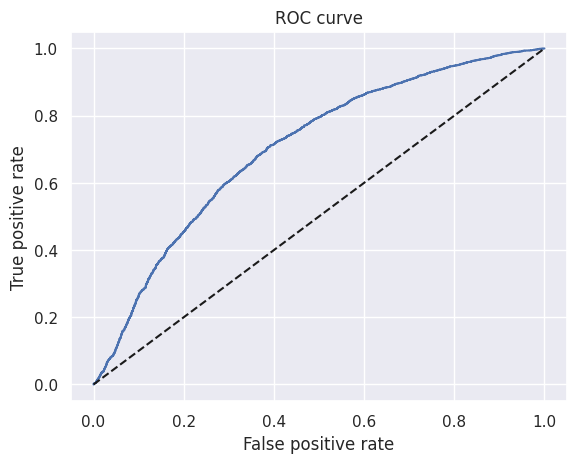

In [87]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [88]:
AUC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUC

np.float64(0.703315452864733)

In [89]:
gini=2*AUC-1
gini

np.float64(0.4066309057294659)

### Stage 2: Regresión Lineal sobre los valores >0

In [90]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [91]:
lgd_stage_2_data.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,recovery_rate,CCF,recovery_rate_0_1
0,0,0,1,0,0,0,0,0,0,0,...,164,0,3,0,4,0,2500,0.046832,0.817416,1
1,0,0,0,0,0,1,0,0,0,0,...,164,0,11,0,13,0,5600,0.033761,0.971068,1
2,0,1,0,0,0,0,0,0,0,0,...,164,0,2,0,3,0,5375,0.050100,0.874701,1
3,0,0,1,0,0,0,0,0,0,0,...,164,0,4,0,9,0,9000,0.049367,0.860429,1
4,0,1,0,0,0,0,0,0,0,0,...,164,0,14,0,29,0,10000,0.064510,0.456653,1


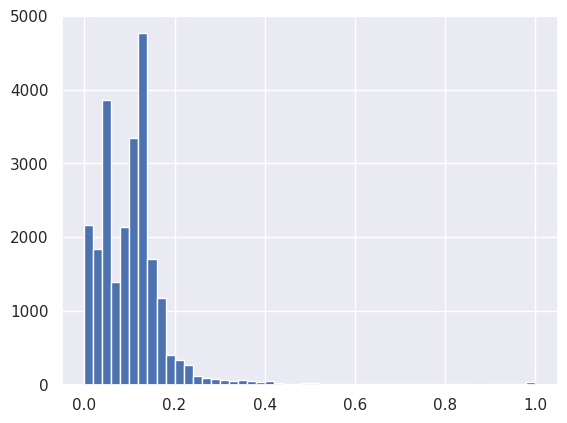

In [92]:
#Ploteamos el recovery rate
plt.hist(lgd_stage_2_data['recovery_rate'], bins = 50)
plt.show()

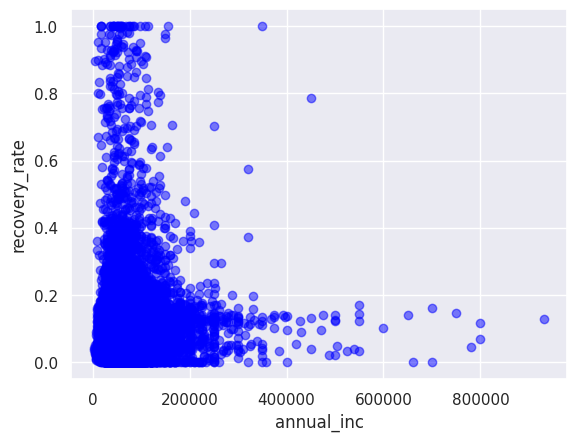

In [93]:
# Plotea variables
plt.scatter(lgd_stage_2_data['annual_inc'], lgd_stage_2_data['recovery_rate'],c='blue', alpha=0.5)
plt.xlabel('annual_inc')
plt.ylabel('recovery_rate')
plt.show()

In [94]:
# Dividimos los datos
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 123)

In [95]:
lgd_inputs_stage_2_train.shape, lgd_inputs_stage_2_test.shape

((19496, 49), (4875, 49))

In [96]:
pipe_1.fit(lgd_inputs_stage_2_train)

Pipeline(steps=[('capper',
                 Winsorizer(capping_method='quantiles', fold=0.01, tail='both',
                            variables=['term_int', 'emp_length_int',
                                       'mths_since_issue_d',
                                       'mths_since_earliest_cr_line',
                                       'funded_amnt', 'int_rate', 'installment',
                                       'annual_inc', 'dti', 'delinq_2yrs',
                                       'inq_last_6mths',
                                       'mths_since_last_delinq',
                                       'mths_since_last_record', 'open_acc',
                                       'pub_rec', 'total_acc',
                                       't...
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['term_int', 'emp_length_int',
                                                   'mths_since_issue_d',
                                                   'mths_since_earliest_cr_line',
                                                   'funded_amnt', 'int_rate',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'open_acc', 'pub_rec',
                                                   'total_acc',
                                                   'total_rev_hi_lim'])],
                                   verbose_feature_names_out=False))])

In [97]:
lgd_inputs_stage_2_train_t = pipe_1.transform(lgd_inputs_stage_2_train)
lgd_inputs_stage_2_test_t = pipe_1.transform(lgd_inputs_stage_2_test)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [99]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train_t, lgd_targets_stage_2_train)

LinearRegression()

In [100]:
print(reg_lgd_st_2.intercept_)
print(reg_lgd_st_2.coef_)

0.16240087267748057
[ 7.62934656e-03  2.91413493e-03 -2.87708667e-02  2.33232861e-03
 -2.30313107e-03 -1.59267622e-02 -4.29176920e-03  3.60721371e-03
  1.78644467e-03  1.53814803e-03  1.49454964e-03 -1.69613410e-03
 -3.67748952e-05 -7.14583442e-03  2.17064408e-03  7.18645911e-03
  4.46289905e-03 -4.08365577e-02 -2.50032777e-02 -9.49278017e-03
  8.13147661e-04  1.50638794e-02  2.61341927e-02  3.33213957e-02
 -3.62347646e-02  9.00995665e-02  2.03762700e-02 -3.65817295e-02
 -3.76593424e-02  1.64174848e-03 -2.16572193e-03  5.23973450e-04
 -1.09312217e-02 -9.15750458e-03 -8.82601680e-03  6.51125135e-02
 -1.08345195e-02 -9.05592229e-03 -3.22377298e-03  3.83861656e-04
 -5.41348732e-03 -6.03431611e-03 -2.35367367e-03 -5.00783110e-03
 -8.21139533e-03  1.35532863e-02 -6.48368864e-03  6.48368864e-03
 -2.82950928e-03]


In [101]:
feature_name = lgd_inputs_stage_2_train_t.columns.values
feature_name

array(['term_int', 'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'total_rev_hi_lim', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'home_ownership:RENT',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', '

In [102]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.162401
1,term_int,0.007629
2,emp_length_int,0.002914
3,mths_since_issue_d,-0.028771
4,mths_since_earliest_cr_line,0.002332
5,funded_amnt,-0.002303
6,int_rate,-0.015927
7,installment,-0.004292
8,annual_inc,0.003607
9,dti,0.001786


### Stage 2 – Evaluación del Modelo

In [ ]:
#lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
#lgd_inputs_stage_2_test.head()

In [ ]:
#lgd_inputs_stage_2_test.shape

In [103]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test_t)
y_hat_test_lgd_stage_2

array([0.10616334, 0.08141196, 0.12668901, ..., 0.09984509, 0.06847898,
       0.09917006])

In [104]:
y_hat_test_lgd_stage_2.shape

(4875,)

In [105]:
pred_linreg_stg2=pd.DataFrame(y_hat_test_lgd_stage_2,columns=['recovery_rate_pred'])

In [106]:
pred_linreg_stg2.head()

,recovery_rate_pred
0,0.106163
1,0.081412
2,0.126689
3,0.138868
4,0.133057


In [107]:
df_pred_stg2=pd.concat([lgd_targets_stage_2_test.reset_index(drop = True), pred_linreg_stg2], axis = 1)
df_pred_stg2.head()

,recovery_rate,recovery_rate_pred
0,0.129592,0.106163
1,0.045055,0.081412
2,0.126236,0.126689
3,0.107608,0.138868
4,0.148448,0.133057


In [108]:
df_pred_stg2.corr()

,recovery_rate,recovery_rate_pred
recovery_rate,1.000000,0.275257
recovery_rate_pred,0.275257,1.000000


In [109]:
reg_lgd_st_2.score(lgd_inputs_stage_2_test_t,lgd_targets_stage_2_test)

0.07508760017981653

In [110]:
np.sqrt(mean_squared_error(lgd_targets_stage_2_test,y_hat_test_lgd_stage_2))

np.float64(0.09333746576164315)

<Axes: xlabel='recovery_rate', ylabel='Density'>

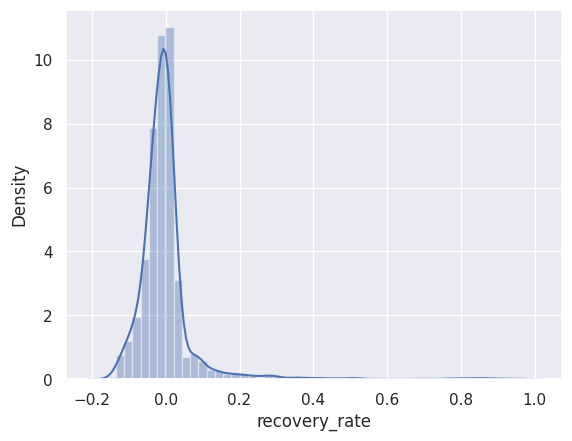

In [111]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)

In [112]:
pd.DataFrame(y_hat_test_lgd_stage_2).describe()

,0
count,4875.000000
mean,0.107798
std,0.029210
min,-0.007378
25%,0.088941
50%,0.109537
75%,0.127690
max,0.246332


In [113]:
y_hat_test_lgd_stage_2 = np.where(y_hat_test_lgd_stage_2 < 0, 0, y_hat_test_lgd_stage_2)
y_hat_test_lgd_stage_2 = np.where(y_hat_test_lgd_stage_2 > 1, 1, y_hat_test_lgd_stage_2)

In [114]:
pd.DataFrame(y_hat_test_lgd_stage_2).describe()

,0
count,4875.000000
mean,0.107800
std,0.029204
min,0.000000
25%,0.088941
50%,0.109537
75%,0.127690
max,0.246332


### Combinamos el Stage 1 y 2: predecir si es =0 o mayor a 0, y para los mayores a 0 cuál es su recuperación

In [115]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test_t)
y_hat_test_lgd_stage_2_all

array([0.15208606, 0.08084355, 0.07670073, ..., 0.07876214, 0.12085935,
       0.13909124])

In [116]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [117]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.062047
std,0.050120
min,-0.003624
25%,0.000000
50%,0.077705
75%,0.104277
max,0.178160


In [118]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [119]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.062048
std,0.050118
min,0.000000
25%,0.000000
50%,0.077705
75%,0.104277
max,0.178160


# Modelo para estimar EAD

In [ ]:
loan_data_defaults['CCF'].describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.hist(loan_data_defaults['CCF'], bins = 50)
plt.show()

In [ ]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop([ 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 123)

In [ ]:
ead_inputs_train = ead_inputs_train[features_all]
ead_inputs_train.head()

In [ ]:
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)

In [ ]:
print(reg_ead.intercept_)
print(reg_ead.coef_)

In [ ]:
feature_name = ead_inputs_train.columns.values

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
summary_table

### Evaluamos el modelo

In [ ]:
ead_inputs_test = ead_inputs_test[features_all]

In [ ]:
ead_inputs_test.head()

In [ ]:
ead_inputs_test.shape

In [ ]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)
y_hat_test_ead

In [ ]:
y_hat_test_ead.shape

In [ ]:
pred_ead=pd.DataFrame(y_hat_test_ead,columns=['y_hat_test_ead'])
pred_ead.head()

In [ ]:
df_ead=pd.concat([ead_targets_test.reset_index(drop = True), pred_ead], axis = 1)
df_ead.head()

In [ ]:
sns.distplot(ead_targets_test - y_hat_test_ead)

In [ ]:
reg_ead.score(ead_inputs_test,ead_targets_test)

In [ ]:
rmse_ead = np.sqrt(mean_squared_error(ead_targets_test,y_hat_test_ead))
rmse_ead

In [ ]:
pred_ead.describe()

In [ ]:
pred_ead['y_hat_test_ead'] = np.where(pred_ead['y_hat_test_ead'] < 0, 0, pred_ead['y_hat_test_ead'])
pred_ead['y_hat_test_ead'] = np.where(pred_ead['y_hat_test_ead'] > 1, 1, pred_ead['y_hat_test_ead'])

In [ ]:
pred_ead.describe()